# STAT3612SML Lecture 2 - Data Exploration

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3612 Statistical Machine Learning](http://www.statsoft.org/teaching/stat3612/)

13 September 2019

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
import pandas as pd
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X.shape

(150, 4)

In [4]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
y = pd.DataFrame(iris.target, columns=['class'])
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [7]:
y['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

# Basic Plots with Matplotlib

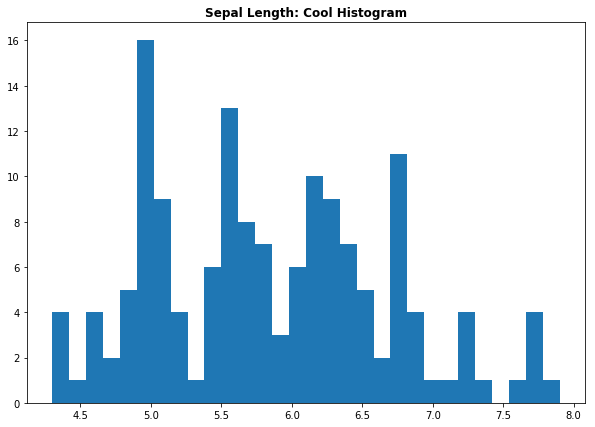

In [8]:
import matplotlib.pyplot as plt
x1 = X['sepal length (cm)']
plt.figure(1, figsize=(10, 7))
plt.hist(x1, bins=30)
plt.title('Sepal Length: Cool Histogram',fontsize=12, fontweight="bold")
plt.show()

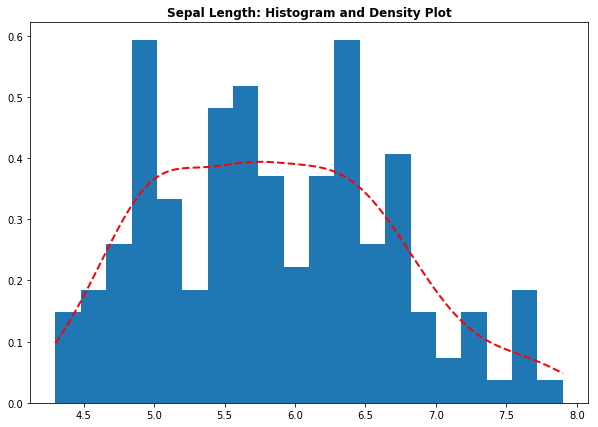

In [9]:
from scipy.stats import gaussian_kde
import numpy as np

kdmodel = gaussian_kde(x1)

plt.figure(1, figsize=(10, 7))
plt.hist(x1, bins=20, density = True)
tmp = np.linspace(x1.min(), x1.max(), 100)
plt.plot(tmp, kdmodel(tmp), color='red', linewidth=2, linestyle='dashed')
plt.title('Sepal Length: Histogram and Density Plot', fontsize=12, fontweight="bold")
plt.show()

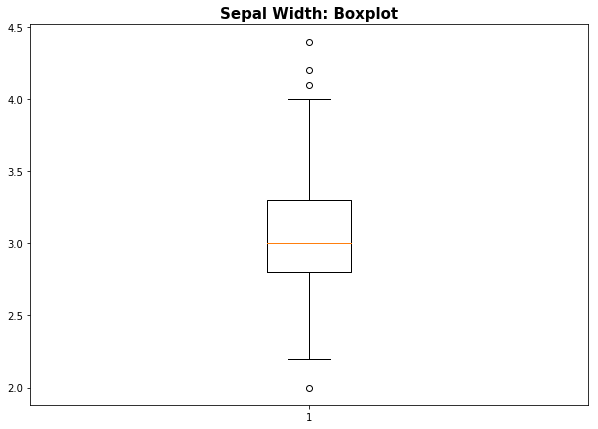

In [10]:
plt.figure(1, figsize=(10, 7))
plt.boxplot(X['sepal width (cm)'])
plt.title('Sepal Width: Boxplot',fontsize=15, fontweight="bold")
plt.show()

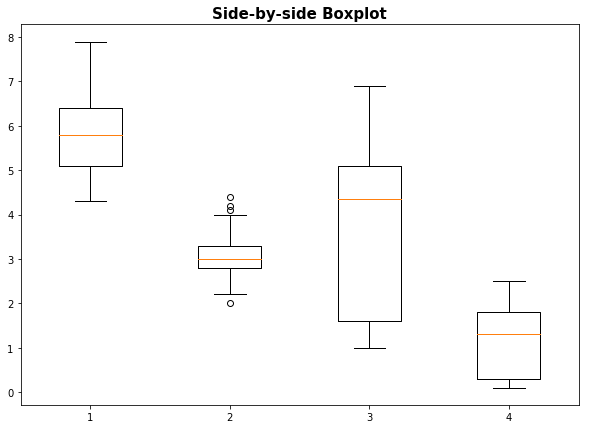

In [11]:
plt.figure(1, figsize=(10, 7))
plt.boxplot(X.T)
plt.title('Side-by-side Boxplot',fontsize=15, fontweight="bold")
plt.show()

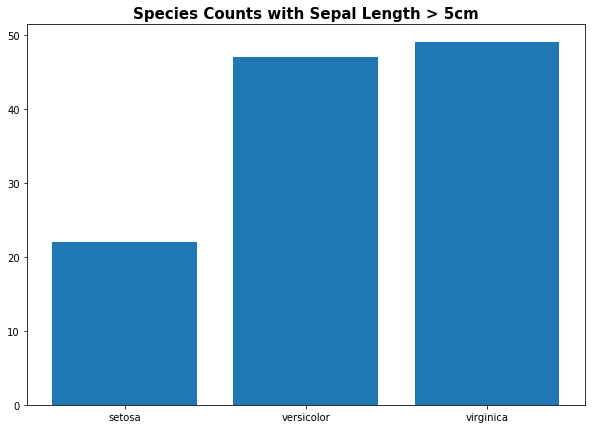

In [12]:
# Bar Chart for Categorical Variable

plt.figure(1, figsize=(10, 7))
plt.bar(iris.target_names, y['class'][X['sepal length (cm)']>5].value_counts().sort_index(ascending=True))
plt.title('Species Counts with Sepal Length > 5cm',fontsize=15, fontweight="bold")
plt.show()

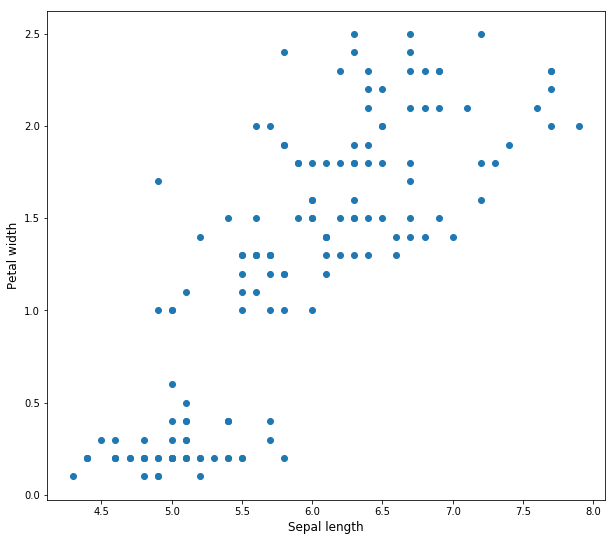

In [13]:
plt.figure(1, figsize=(10, 9))
x1, x2 = X['sepal length (cm)'], X['petal width (cm)']
plt.scatter(x1, x2)
plt.xlabel('Sepal length', fontsize=12)
plt.ylabel('Petal width', fontsize=12)
plt.show()

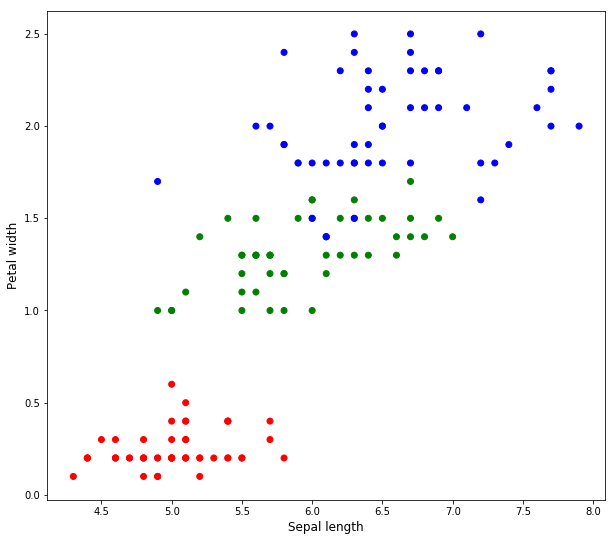

In [14]:
import matplotlib.colors as col

plt.figure(1, figsize=(10, 9))
plt.scatter(x1, x2, c=y.values[:,0], cmap=col.ListedColormap(['red', 'green', 'blue']))
plt.xlabel('Sepal length', fontsize=12)
plt.ylabel('Petal width', fontsize=12)
plt.show()

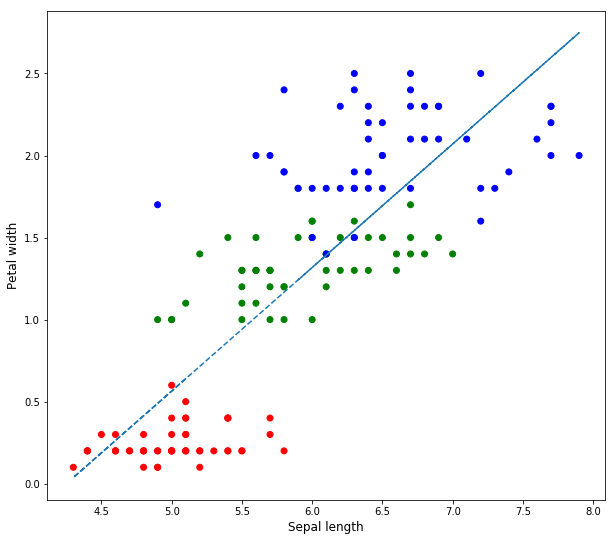

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x1.values.reshape([-1, 1]), x2.values.reshape([-1, 1]))
fit = model.predict(x1.values.reshape([-1, 1]))

plt.figure(1, figsize=(10, 9))
plt.scatter(x1, x2, c=y.values[:,0], cmap=col.ListedColormap(['red', 'green', 'blue']))
plt.plot(x1, fit, linestyle='dashed')
plt.xlabel('Sepal length', fontsize=12)
plt.ylabel('Petal width', fontsize=12)
plt.show()

# Data Exploration with Pandas

## a) Pandas for data manipulation

**Data Merge/Join**

In [16]:
Data = pd.merge(X, y, left_index = True, right_index=True)
Data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


**Data Sudset/Filter**

In [17]:
Data.iloc[[1,2,51,52,101,102],:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2


In [18]:
tmp = Data[(Data['class']==1) & (Data['sepal length (cm)']> 6.6)]
tmp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
50,7.0,3.2,4.7,1.4,1
52,6.9,3.1,4.9,1.5,1
65,6.7,3.1,4.4,1.4,1
76,6.8,2.8,4.8,1.4,1
77,6.7,3.0,5.0,1.7,1
86,6.7,3.1,4.7,1.5,1


**Data Sort/Arrange**

In [19]:
tmp.sort_values(by = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'], 
                ascending = [True, True, False])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
77,6.7,3.0,5.0,1.7,1
86,6.7,3.1,4.7,1.5,1
65,6.7,3.1,4.4,1.4,1
76,6.8,2.8,4.8,1.4,1
52,6.9,3.1,4.9,1.5,1
50,7.0,3.2,4.7,1.4,1


**New Varaible Create/Mutate**

In [20]:
Data['sepal.size'] = Data['sepal length (cm)']*Data['sepal width (cm)']
Data['petal.size'] = Data['petal length (cm)']*Data['petal width (cm)']
Data.head(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,sepal.size,petal.size
0,5.1,3.5,1.4,0.2,0,17.85,0.28
1,4.9,3.0,1.4,0.2,0,14.70,0.28
2,4.7,3.2,1.3,0.2,0,15.04,0.26
3,4.6,3.1,1.5,0.2,0,14.26,0.30
4,5.0,3.6,1.4,0.2,0,18.00,0.28
5,5.4,3.9,1.7,0.4,0,21.06,0.68
6,4.6,3.4,1.4,0.3,0,15.64,0.42
7,5.0,3.4,1.5,0.2,0,17.00,0.30


### Group_by Summary

In [21]:
Data.groupby('class').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal.size,petal.size
class,,,,,,
0,5.006,3.428,1.462,0.246,17.2578,0.3656
1,5.936,2.770,4.260,1.326,16.5262,5.7204
2,6.588,2.974,5.552,2.026,19.6846,11.2962


In [22]:
Data.groupby('class').var()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal.size,petal.size
class,,,,,,
0,0.124249,0.143690,0.030159,0.011106,8.607034,0.032817
1,0.266433,0.098469,0.220816,0.039106,8.219012,1.872526
2,0.404343,0.104004,0.304588,0.075433,11.963180,4.654428


## b) Pandas for data visualization

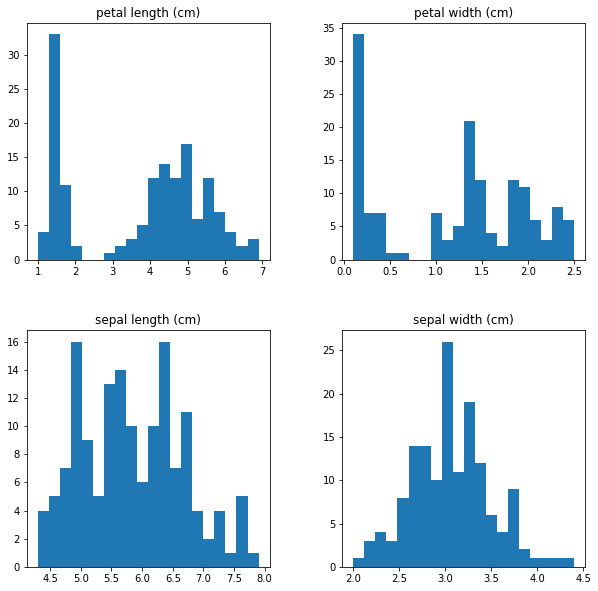

In [23]:
Data.iloc[:,0:4].hist(bins=20, grid=False, figsize=(10,10))
plt.show()

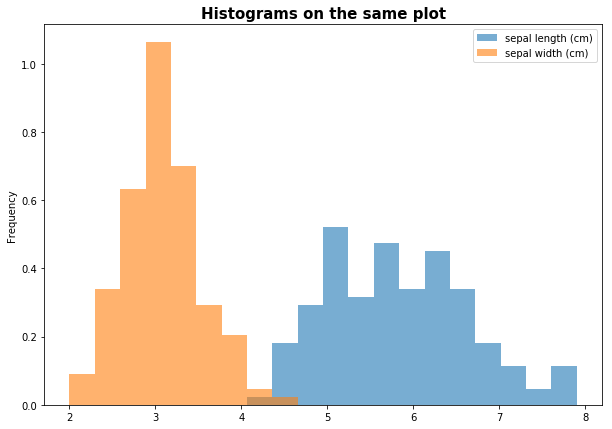

In [24]:
Data.iloc[:,[0,1]].plot.hist(bins=20, density=True, alpha=0.6, figsize=(10,7))
plt.title('Histograms on the same plot',fontsize=15, fontweight="bold")
plt.show()

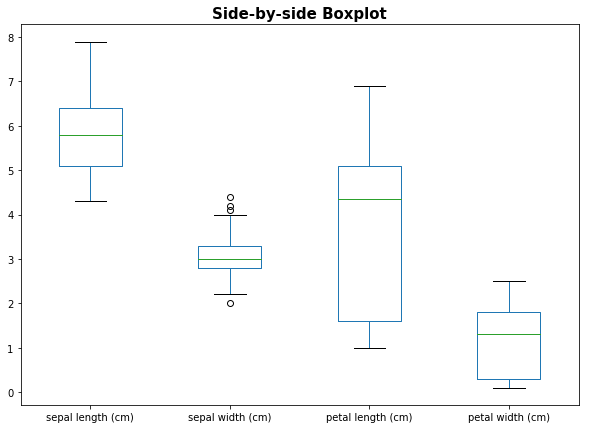

In [25]:
Data.iloc[:,0:4].boxplot(grid=False, figsize=(10,7))
plt.title('Side-by-side Boxplot',fontsize=15, fontweight="bold")
plt.show()

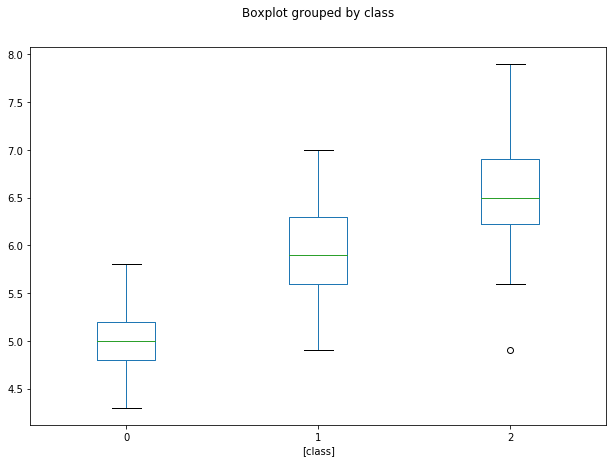

In [26]:
Data[['sepal length (cm)', 'class']].boxplot(by="class", grid=False, figsize=(10,7))
plt.title('') # to remove the redundant title 
plt.show()

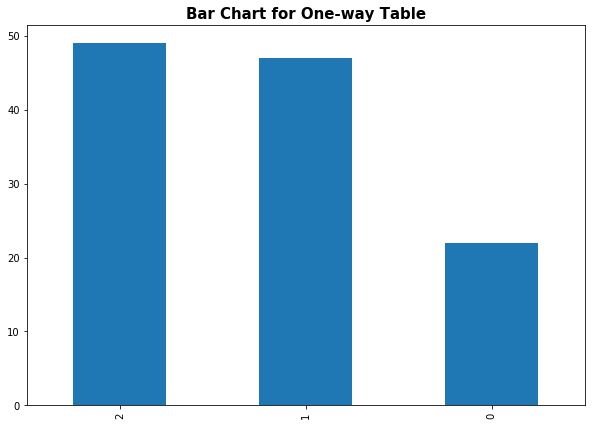

In [27]:
Data['flag'] = Data['sepal length (cm)']>5

Data[Data['flag']]['class'].value_counts().plot.bar(figsize=(10,7))
plt.title('Bar Chart for One-way Table',fontsize=15, fontweight="bold")
plt.show()

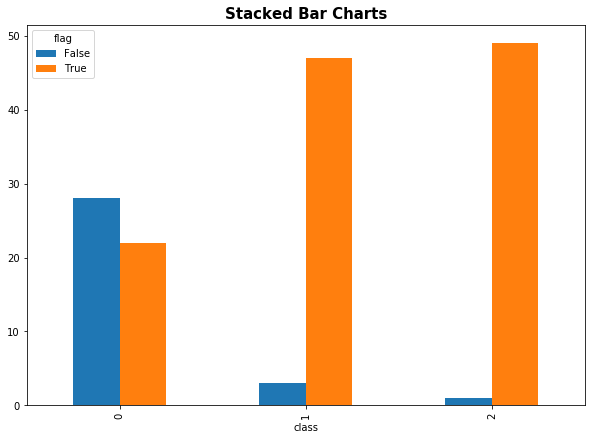

In [28]:
pd.crosstab(Data['class'], Data['flag']).plot.bar(stacked=False, figsize=(10,7))
plt.title('Stacked Bar Charts', fontsize=15, fontweight="bold")
plt.show()

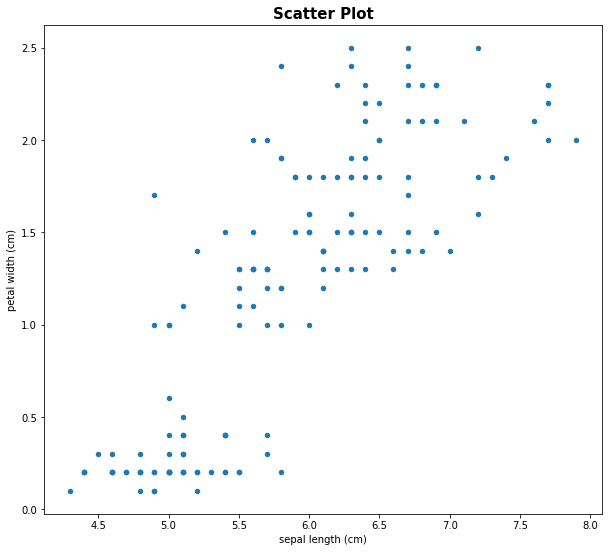

In [29]:
Data.plot.scatter(x=0, y=3, figsize=(10,9))
plt.title('Scatter Plot', fontsize=15, fontweight="bold")
plt.show()

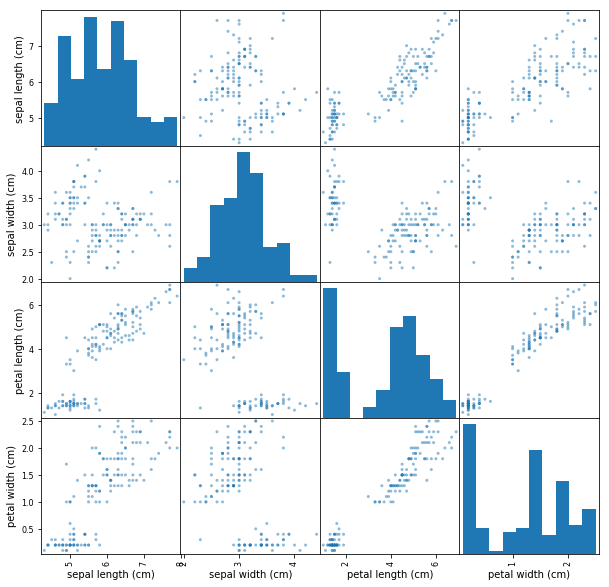

In [30]:
import pandas.plotting as pdplt

pdplt.scatter_matrix(X, figsize=(10,10))
plt.show()